# Verification

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from sithom.plot import plot_defaults, label_subplots
from sithom.time import timeit
from src.conversions import si_ify, knots_to_ms
from src.constants import KATRINA_ERA5_NC, KATRINA_TIDE_NC, KAT_EX_PATH, NO_BBOX
from src.data_loading.ibtracs import kat_stats, katrina
from adcircpy.outputs import Maxele

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
/Users/simon/new-orleans/env/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
@np.vectorize
def indices_in_bbox(lon, lat):
    return (
        lon > NO_BBOX.lon[0]
        and lon < NO_BBOX.lon[1]
        and lat > NO_BBOX.lat[0]
        and lat < NO_BBOX.lat[1]
    )

## Tide Stations

In [4]:
tide_ds = xr.open_dataset(KATRINA_TIDE_NC)
tide_ds

/Users/simon/new-orleans/env/lib/python3.8/site-packages/xarray/backends/plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:      (date_time: 3121, stationid: 7)
Coordinates:
  * date_time    (date_time) datetime64[ns] 2005-08-20 ... 2005-09-02
    name         (stationid) object ...
  * stationid    (stationid) object '8729840' '8735180' ... '8762482' '8764044'
    lon          (stationid) float64 ...
    lat          (stationid) float64 ...
Data variables:
    flags        (stationid, date_time) object ...
    QC           (stationid, date_time) object ...
    water_level  (stationid, date_time) float64 ...
    sigma        (stationid, date_time) float64 ...

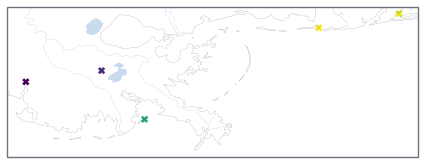

In [5]:
from src.plot.map import map_axes
from sithom.plot import plot_defaults

plot_defaults()
map_axes()
plt.scatter(
    tide_ds.lon.values,
    tide_ds.lat.values,
    c=tide_ds.isel(date_time=2000).water_level.values,
)

In [6]:
ftide_ds = tide_ds.isel(
    stationid=~np.isnan(tide_ds.isel(date_time=2000).water_level.values)
)

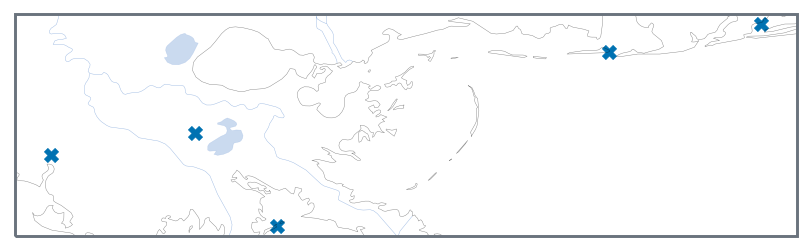

In [7]:
plot_defaults()
map_axes()
plt.scatter(
    ftide_ds.lon.values,
    ftide_ds.lat.values,
    # c=ftide_ds.isel(date_time=2000).water_level.values,
)

In [8]:
me.triplot()

plt.scatter(
    ftide_ds.lon.values,
    ftide_ds.lat.values,
    # c=ftide_ds.isel(date_time=2000).water_level.values,
)
NO_BBOX.ax_lim(plt.gca())
NO_BBOX.ax_label(plt.gca())

NameError: name 'me' is not defined

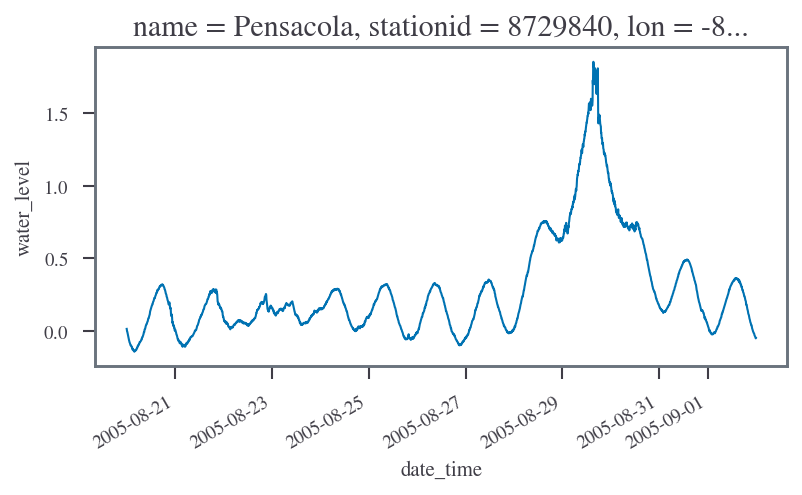

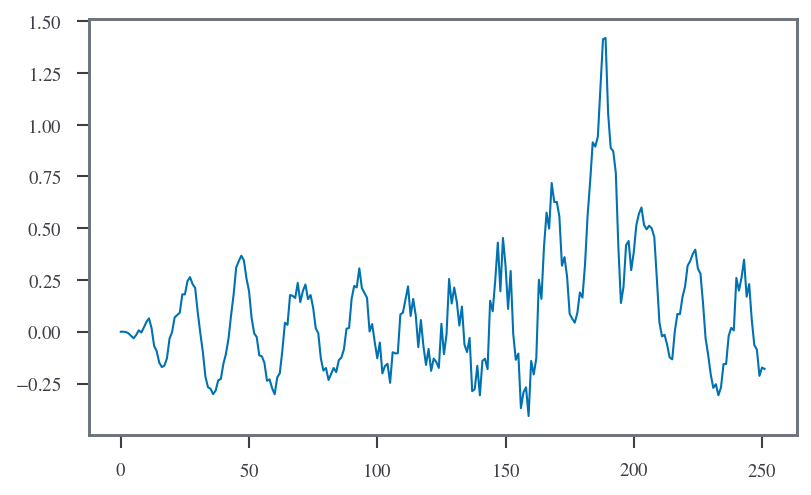

In [ ]:
ftide_ds.isel(stationid=0).water_level.plot()
plt.show()
plt.plot(f63._ptr["zeta"][:, 5248])

In [ ]:
ftide_ds.isel(stationid=0).water_level.max()

<xarray.DataArray 'water_level' ()>
array(1.85)
Coordinates:
    name       object 'Pensacola'
    stationid  <U7 '8729840'
    lon        float64 -87.21
    lat        float64 30.4

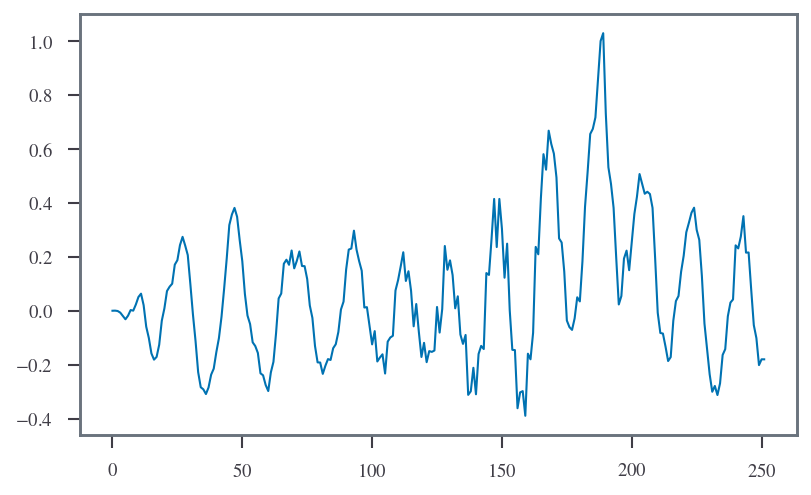

In [ ]:
plt.plot(f63._ptr["zeta"][:, 5247])

In [ ]:
lon = ftide_ds.isel(stationid=0).lon.values
lat = ftide_ds.isel(stationid=0).lat.values
lats = me.y.copy()
lons = me.x.copy()
index_list = []
for i in range(10):
    index = ((lons - lon) ** 2 + (lats - lat) ** 2).argmin()
    print("index", index)
    print(lons[index], lats[index])
    index_list.append(index)
    lons[index] = -100
    lats[index] = -100

index 5248
-87.2488388436 30.392522601500005
index 5247
-87.0854739003 30.3586722097
index 5493
-87.2134215648 30.209944678399996
index 4969
-87.0171468724 30.553716508999997
index 5249
-87.0037748604 30.2457565717
index 5250
-87.4502800306 30.292306637
index 4970
-86.9441873605 30.391420688000004
index 5494
-87.0493433006 30.1069498943
index 5495
-87.457393187 30.112945241
index 5251
-87.5763437408 30.270937113699997


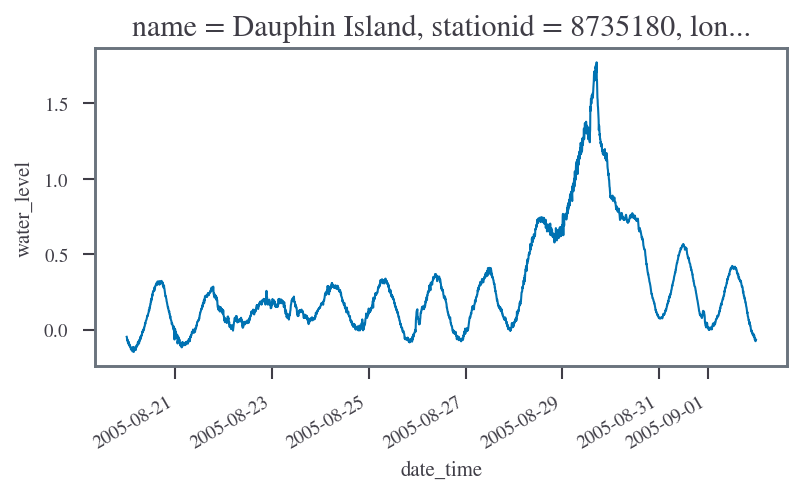

In [ ]:
ftide_ds.isel(stationid=1).water_level.plot()

In [ ]:
lon = ftide_ds.isel(stationid=0).lon.values
lat = ftide_ds.isel(stationid=0).lat.values
lats = me.y.copy()
lons = me.x.copy()
index_list = []
for i in range(10):
    index = ((lons - lon) ** 2 + (lats - lat) ** 2).argmin()
    print("index", index)
    print(lons[index], lats[index])
    index_list.append(index)
    lons[index] = -100
    lats[index] = -100

index 5248
-87.2488388436 30.392522601500005
index 5247
-87.0854739003 30.3586722097
index 5493
-87.2134215648 30.209944678399996
index 4969
-87.0171468724 30.553716508999997
index 5249
-87.0037748604 30.2457565717
index 5250
-87.4502800306 30.292306637
index 4970
-86.9441873605 30.391420688000004
index 5494
-87.0493433006 30.1069498943
index 5495
-87.457393187 30.112945241
index 5251
-87.5763437408 30.270937113699997


1.4189976480577502 m
1.4115362140782735 m
1.3796015917757742 m
1.114982998476829 m
1.3948157730879884 m
<xarray.DataArray 'water_level' ()>
array(1.85)
Coordinates:
    name       object 'Pensacola'
    stationid  <U7 '8729840'
    lon        float64 -87.21
    lat        float64 30.4


Text(0, 0.5, 'Water Height [m]')

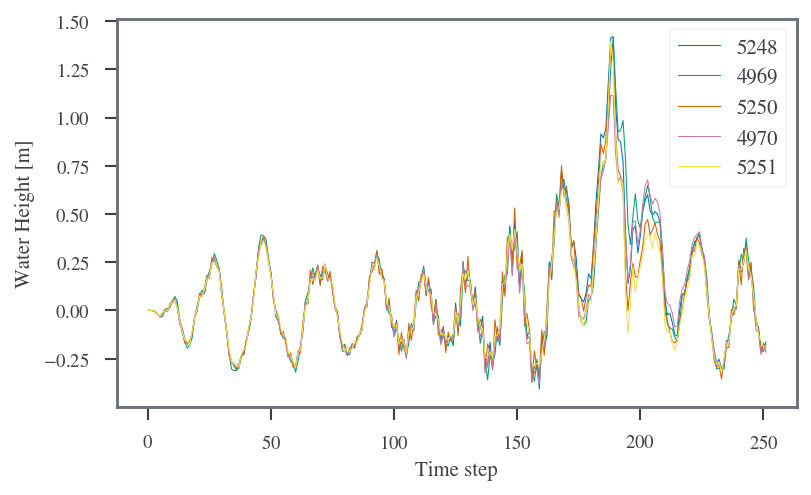

In [ ]:
for nindex in nindices.tolist():
    plt.plot(f63._ptr["zeta"][:, nindex], linewidth=0.5, label=str(nindex))
    print(f63._ptr["zeta"][:, nindex].max(), "m")

print(ftide_ds.isel(stationid=0).water_level.max())

plt.legend()
plt.xlabel("Time step")
plt.ylabel("Water Height [m]")

In [ ]:
(uniq, freq) = np.unique(me.triangles, return_counts=True)

In [ ]:
coastals = uniq[freq <= 4]
indices = np.array(index_list)

In [ ]:
indices[[x in coastals for x in index_list]]

array([5248, 4969, 5250, 4970, 5251])

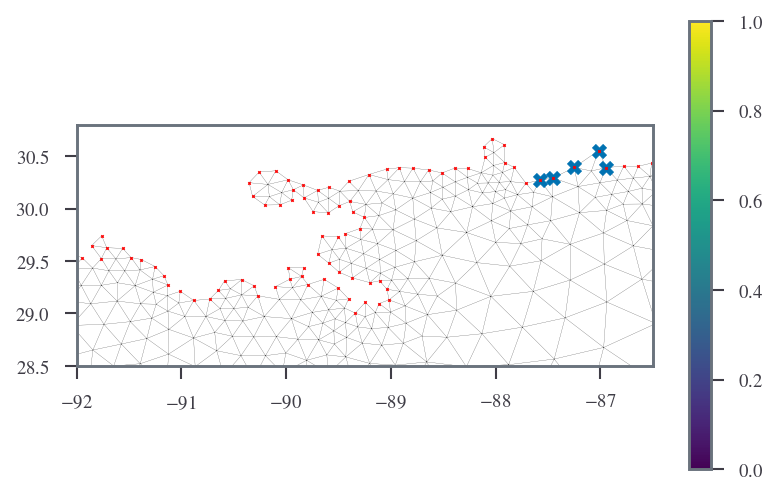

In [ ]:
nindices = indices[[x in coastals for x in index_list]]
me.triplot()
lats = me.y.copy()
lons = me.x.copy()
indices = np.array(index_list)
plt.scatter(lons[nindices], lats[nindices])
coastals = uniq[freq <= 4]
plt.scatter(lons[coastals], lats[coastals], s=2, color="red")
plt.colorbar()
NO_BBOX.ax_lim(plt.gca())

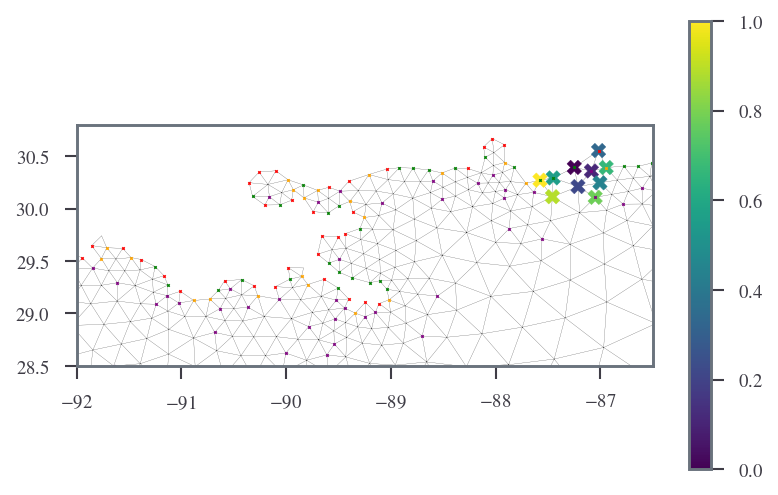

In [ ]:
me.triplot()
lats = me.y.copy()
lons = me.x.copy()
indices = np.array(index_list)
plt.scatter(
    lons[indices], lats[indices], c=np.array([x for x in range(1, len(index_list) + 1)])
)
coastals = uniq[freq == 2]
plt.scatter(lons[coastals], lats[coastals], s=2, color="red")
coastals = uniq[freq == 3]
plt.scatter(lons[coastals], lats[coastals], s=2, color="green")
coastals = uniq[freq == 4]
plt.scatter(lons[coastals], lats[coastals], s=2, color="orange")
coastals = uniq[freq == 5]
plt.scatter(lons[coastals], lats[coastals], s=2, color="purple")
plt.colorbar()
NO_BBOX.ax_lim(plt.gca())

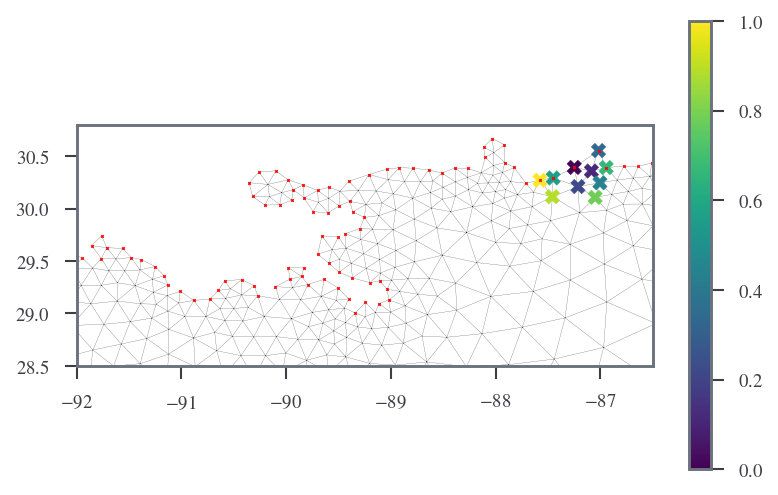

In [ ]:
me.triplot()
lats = me.y.copy()
lons = me.x.copy()
indices = np.array(index_list)
plt.scatter(
    lons[indices], lats[indices], c=np.array([x for x in range(1, len(index_list) + 1)])
)
coastals = uniq[freq <= 4]
plt.scatter(lons[coastals], lats[coastals], s=2, color="red")

plt.colorbar()
NO_BBOX.ax_lim(plt.gca())

(array([  48.,  441.,  830.,    0.,  431., 1302.,    0., 4152., 1075.,
          24.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

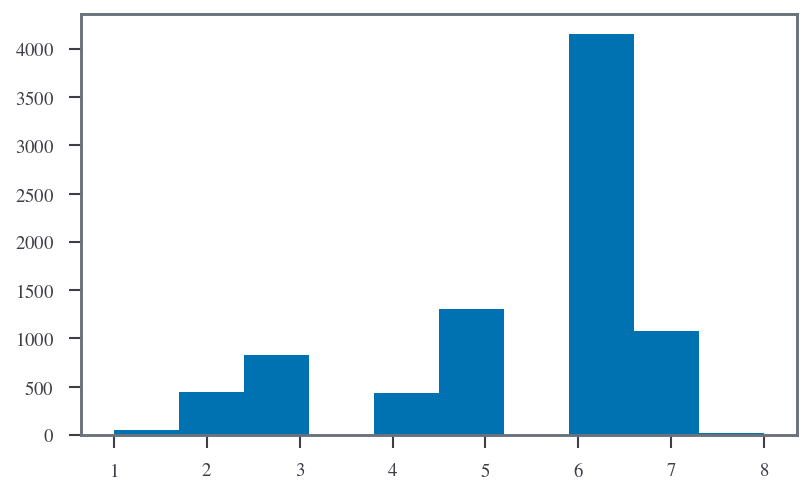

In [ ]:
plt.hist(freq)

In [ ]:
uniq[freq == 2].shape

(441,)

In [ ]:
freq == 2

array([ True,  True, False, ..., False,  True,  True])

In [ ]:
me.triangles

array([[5188, 5433, 5189],
       [7844, 7776, 7843],
       [4550, 4805, 4806],
       ...,
       [ 996, 1078, 1077],
       [ 995, 1077, 1076],
       [1078, 1167, 1077]], dtype=int32)

In [ ]:
me.values

masked_array(data=[0.52930635, 0.52131775, 4.42008263, ..., 0.30354818,
                   0.43842792, 0.37231238],
             mask=False,
       fill_value=1e+20)

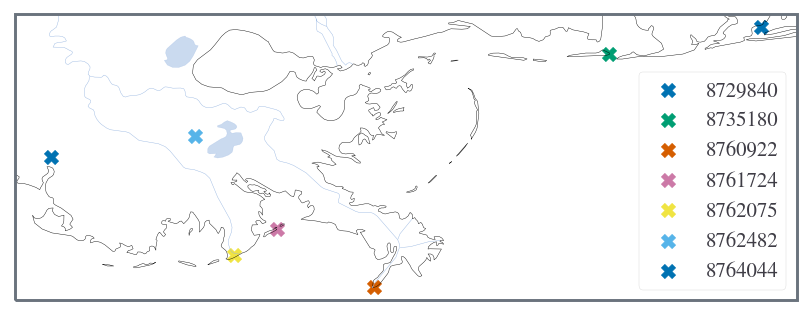

In [ ]:
plot_defaults()
map_axes()
for i in range(len(tide_ds.lon.values)):
    tmp_ds = tide_ds.isel(stationid=i)
    plt.scatter(
        tmp_ds.lon.values, tmp_ds.lat.values, label=str(tmp_ds.stationid.values)
    )

plt.legend()

In [ ]:
gi = tide_ds.sel(stationid="8761724")
gi

<xarray.Dataset>
Dimensions:      (date_time: 3121)
Coordinates:
  * date_time    (date_time) datetime64[ns] 2005-08-20 ... 2005-09-02
    name         object 'Grand Isle'
    stationid    <U7 '8761724'
    lon          float64 -89.96
    lat          float64 29.26
Data variables:
    flags        (date_time) object '1,0,0,0' '0,0,0,0' ... '0,0,0,0' '1,0,0,0'
    QC           (date_time) object 'v' 'v' 'v' 'v' 'v' ... 'v' 'v' 'v' 'v' 'v'
    water_level  (date_time) float64 -0.239 -0.244 -0.243 ... -0.16 -0.163
    sigma        (date_time) float64 0.0 0.004 0.005 0.004 ... 0.002 0.002 0.0

## Find Corresponding Mesh Point

In [ ]:
import os

In [ ]:
os.listdir(KAT_EX_PATH)

['minpr.63.nc',
 'maxwvel.63.nc',
 'windDrag.173.nc',
 'fort.73.nc',
 'fort.63.nc',
 'fort.22',
 'fort.14',
 'maxvel.63.nc',
 'fort.15',
 'fort.218',
 'fort.221',
 'fort.217',
 'run.sh',
 'adcirc_log.txt',
 'maxele.63.nc',
 'comparison.log',
 'fort.33',
 'fort.74.nc',
 'fort.64.nc',
 'fort.16',
 'control',
 'fort.224',
 'fort.223',
 'fort.222']

In [ ]:
me = Maxele(os.path.join(KAT_EX_PATH, "maxele.63.nc"))

In [ ]:
local_indices = indices_in_bbox(me.x, me.y)

In [ ]:
global_index = ((gi.lon.values - me.x) ** 2 + (gi.lat.values - me.y) ** 2).argmin()
global_index

4993

In [ ]:
local_index = (
    (gi.lon.values - me.x[local_indices]) ** 2
    + (gi.lat.values - me.y[local_indices]) ** 2
).argmin()
local_index

120

In [ ]:
print(me.x[global_index], me.y[global_index])
print(gi.lon.values, gi.lat.values)

-89.93858590820001 29.2449848667
-89.957 29.263


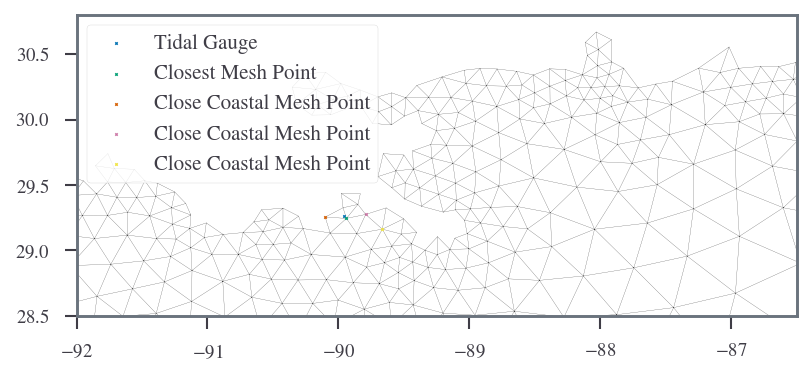

In [ ]:
me.triplot()
NO_BBOX.ax_lim(plt.gca())
s = 2
o = 2
plt.scatter(gi.lon.values, gi.lat.values, label="Tidal Gauge", s=s)
plt.scatter(me.x[global_index], me.y[global_index], label="Closest Mesh Point", s=s)
plt.scatter(
    me.x[global_index + 1],
    me.y[global_index + 1],
    label="Close Coastal Mesh Point",
    s=s,
)
plt.scatter(
    me.x[global_index - 1],
    me.y[global_index - 1],
    label="Close Coastal Mesh Point",
    s=s,
)
plt.scatter(
    me.x[global_index + o],
    me.y[global_index + o],
    label="Close Coastal Mesh Point",
    s=s,
)

plt.legend()

## Comparing ADCIRC exampel Fort.63 file to tidal gauge 

In [ ]:
from adcircpy.outputs import Fort63

In [ ]:
f63 = Fort63(os.path.join(KAT_EX_PATH, "fort.63.nc"))

Text(0.5, 0, 'Time Index')

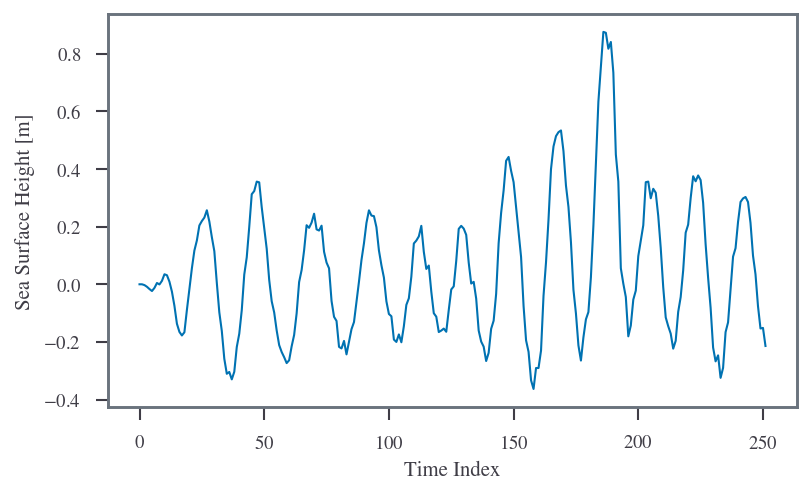

In [ ]:
plt.plot(f63._ptr["zeta"][:, global_index])
plt.ylabel("Sea Surface Height [m]")
plt.xlabel("Time Index")

Text(0.5, 0, 'Time Index')

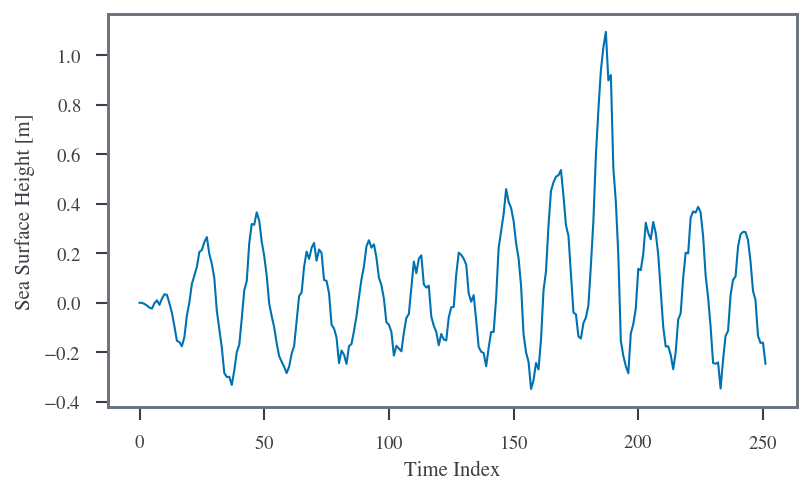

In [ ]:
plt.plot(f63._ptr["zeta"][:, global_index - 1])
plt.ylabel("Sea Surface Height [m]")
plt.xlabel("Time Index")

Text(0.5, 0, 'Time Index')

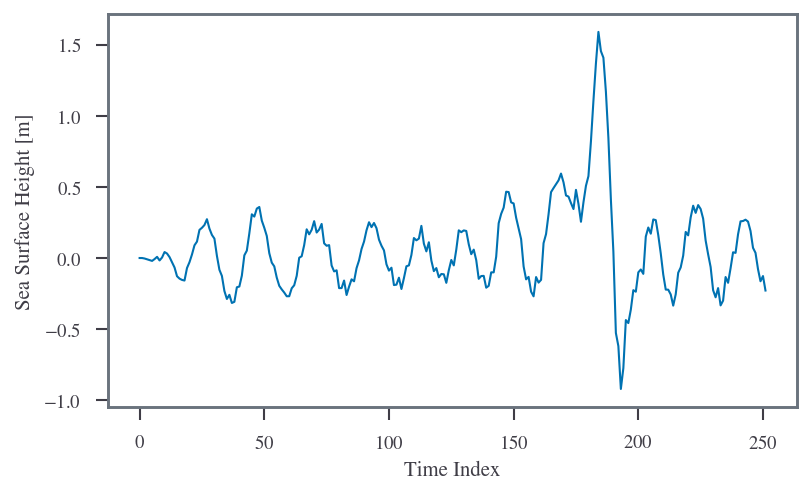

In [ ]:
plt.plot(f63._ptr["zeta"][:, global_index + 1])
plt.ylabel("Sea Surface Height [m]")
plt.xlabel("Time Index")

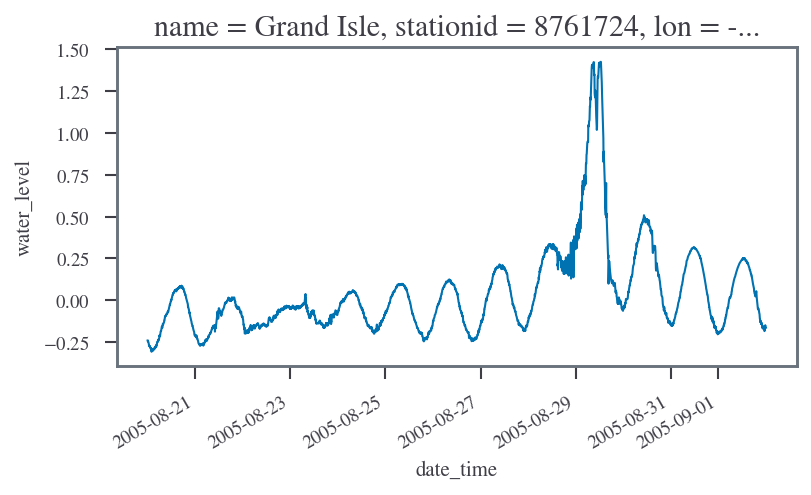

In [ ]:
gi.water_level.plot()

## 

## ERA5 run prep

In [ ]:
e5 = xr.open_dataset(KATRINA_ERA5_NC)
e5

In [ ]:
from src.constants import MID_KATRINA_TIME
from src.preprocessing.sel import mid_katrina
from sithom.plot import label_subplots, get_dim
from sithom.xr import plot_units
from src.conversions import pascal_to_millibar

In [ ]:
e5 = plot_units(xr.open_dataset(KATRINA_ERA5_NC))
fig, axs = plt.subplots(3, 1, sharex=True, figsize=get_dim(ratio=2))
mid_katrina(e5.u10).plot(ax=axs[0])
axs[0].set_xlabel("")
mid_katrina(e5.v10).plot(ax=axs[1])
axs[1].set_title("")
axs[1].set_xlabel("")
pres = mid_katrina(e5.msl)
pres[:] = pascal_to_millibar(pres.values)
pres.attrs["units"] = "mb"
pres.plot(ax=axs[2])
axs[2].set_title("")
label_subplots(axs)

## Compare time axes

In [ ]:
from src.constants import DATA_PATH

In [ ]:
dsp = xr.open_dataset(os.path.join(DATA_PATH, "fort.221.nc"))
dsp

In [ ]:
dsw = xr.open_dataset(os.path.join(DATA_PATH, "fort.222.nc"))
dsw

In [ ]:
dsw.time

In [ ]:
e5 = xr.open_dataset(KATRINA_ERA5_NC)
e5.time

In [ ]:
e5.sel(time=slice("2005-08-25", "2005-08-31"))

In [ ]:
ca = (
    e5[["msl", "u10", "v10"]]
    .sel(time=slice("2005-08-24T23", "2005-08-31T22"))
    .coarsen(time=3)
    .mean()
)
ca

In [ ]:
ca.time

In [ ]:
assert np.all(dsw.time.values == ca.time.values)

## Change ERA5 to ADCIRC Input

In [ ]:
ca[["u10", "v10"]].rename(
    {"u10": "U10", "v10": "V10", "longitude": "lon", "latitude": "lat"}
)

In [ ]:
print(dsw.lat.min(), dsw.lat.max(), dsw.lon.min(), dsw.lon.max())

In [ ]:
from sithom.place import BoundingBox

In [ ]:
bbox = BoundingBox(
    lon=[-99, -74.25], lat=[17, 41.75], desc="Katrina Example Input Bounds"
)
bbox

In [ ]:
bbox.ecmwf()

In [ ]:
def add_padding(bb: BoundingBox, padding=0.5) -> BoundingBox:
    return BoundingBox(
        lon=[bb.lon[0] - padding, bb.lon[1] + padding],
        lat=[bb.lat[0] - padding, bb.lat[1] + padding],
        desc=bb.desc,
    )

In [ ]:
add_padding(bbox).ecmwf()

In [ ]:
from src.data_loading.ecmwf import katrina_example_netcdf

In [ ]:
katrina_example_netcdf(file_name=os.path.join(DATA_PATH, "katrina_example_input.nc"))

In [ ]:
! rm /Users/simon/new-orleans/data/katrina_example_input.nc

In [ ]:
from sithom.xr import mon_increase

In [ ]:
e5e = mon_increase(
    xr.open_dataset(os.path.join(DATA_PATH, "katrina_example_input.nc")),
    x_dim="lon",
    y_dim="lat",
)
e5e

In [ ]:
dsw

In [ ]:
dsw.U10.values.shape

In [ ]:
e5e.U10.values.shape

In [ ]:
e5e = mon_increase(
    xr.open_dataset(os.path.join(DATA_PATH, "katrina_example_input.nc")),
    x_dim="lon",
    y_dim="lat",
)
ce5e = e5e.sel(lon=slice(-99, -74.25), lat=slice(17, 41.75))
ce5e["pres"][:] = pascal_to_millibar(ce5e["pres"].values)
ce5e["pres"].attrs["units"] = "mb"

In [ ]:
ce5e[["U10", "V10"]]

In [ ]:
ce5e[["pres"]]

In [ ]:
print_wsp(ce5e[["U10", "V10"]], os.path.join(DATA_PATH, "katex.fort.222"))
print_pressure(ce5e["pres"], os.path.join(DATA_PATH, "katex.fort.221"))

In [ ]:
?print_wsp

## Check new input files

In [ ]:
from src.data_loading.adcirc import (
    print_wsp,
    print_pressure,
    read_windspeeds,
    read_pressures,
)

In [ ]:
read_pressures(os.path.join(DATA_PATH, "katex.fort.221")).isel(time=40).plot()

In [ ]:
u10_exp = read_windspeeds(os.path.join(DATA_PATH, "katex.fort.222")).U10.isel(time=41)
u10_exp.plot()

In [ ]:
read_windspeeds(os.path.join(DATA_PATH, "katex.fort.222")).V10.isel(time=41).plot()

## Make inputs and run

In [ ]:
dsw.U10.isel(time=41).plot()

In [ ]:
(u10_exp - dsw.U10.isel(time=41)).plot()

## Verification